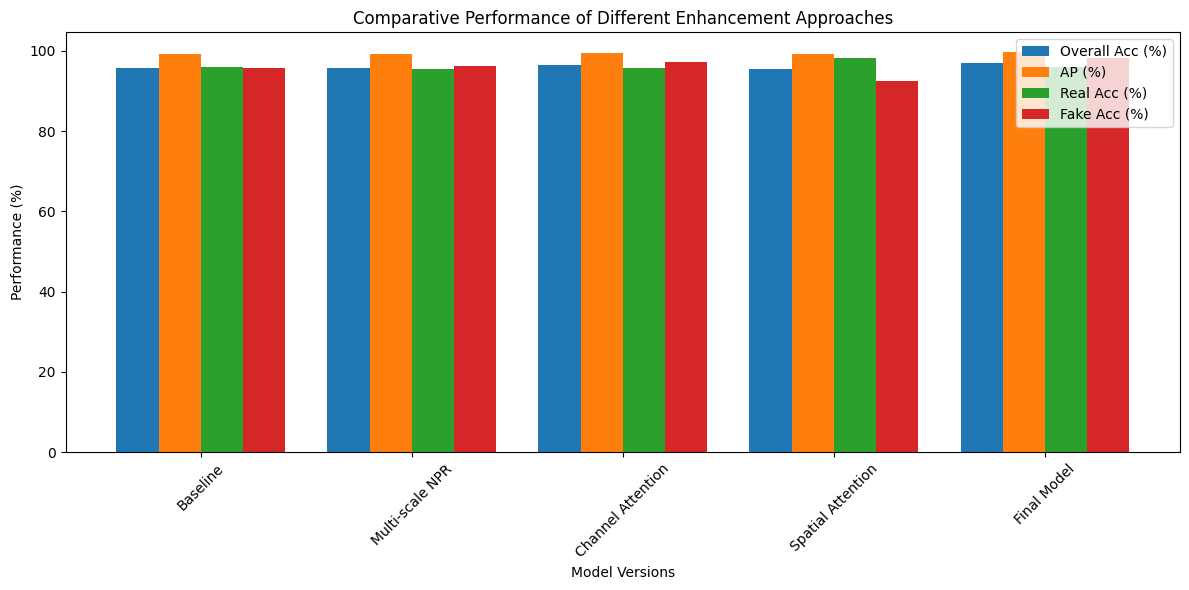

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Baseline', 'Multi-scale NPR', 'Channel Attention', 'Spatial Attention', 'Final Model']
metrics = ['Overall Acc (%)', 'AP (%)', 'Real Acc (%)', 'Fake Acc (%)']
data = [
    [95.79, 99.22, 95.86, 95.71],
    [95.76, 99.18, 95.40, 96.11],
    [96.51, 99.47, 95.74, 97.29],
    [95.34, 99.15, 98.14, 92.54],
    [97.06, 99.62, 96.03, 98.09]
]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, [row[i] for row in data], width, label=metric)

ax.set_xlabel('Model Versions')
ax.set_ylabel('Performance (%)')
ax.set_title('Comparative Performance of Different Enhancement Approaches')
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(models, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


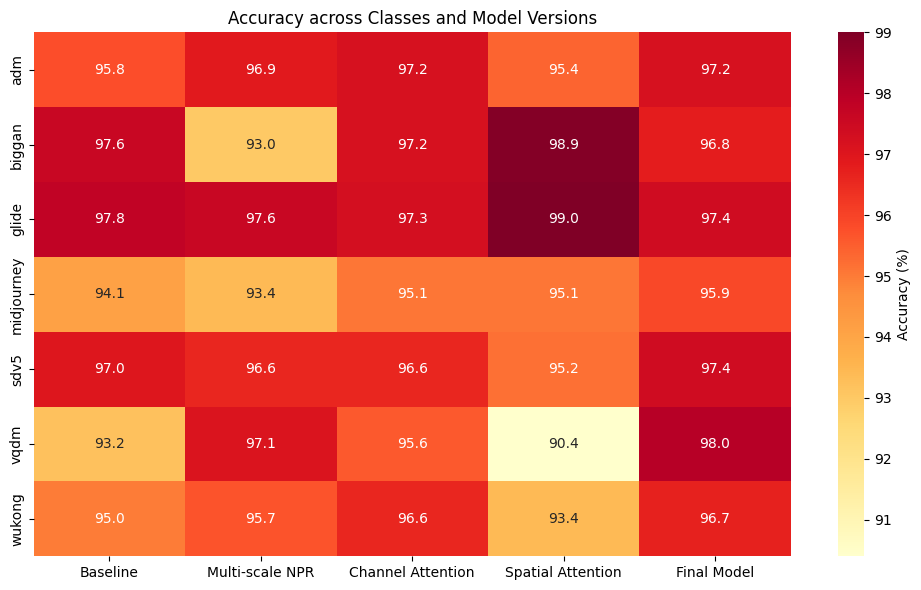

In [ ]:
import seaborn as sns
import pandas as pd

classes = ['adm', 'biggan', 'glide', 'midjourney', 'sdv5', 'vqdm', 'wukong']
acc_data = {
    'Baseline': [95.8, 97.6, 97.8, 94.1, 97.0, 93.2, 95.0],
    'Multi-scale NPR': [96.9, 93.0, 97.6, 93.4, 96.6, 97.1, 95.7],
    'Channel Attention': [97.2, 97.2, 97.3, 95.1, 96.6, 95.6, 96.6],
    'Spatial Attention': [95.4, 98.9, 99.0, 95.1, 95.2, 90.4, 93.4],
    'Final Model': [97.2, 96.8, 97.4, 95.9, 97.4, 98.0, 96.7]
}

df_acc = pd.DataFrame(acc_data, index=classes)

plt.figure(figsize=(10, 6))
sns.heatmap(df_acc, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Accuracy (%)'})
plt.title('Accuracy across Classes and Model Versions')
plt.tight_layout()
plt.show()

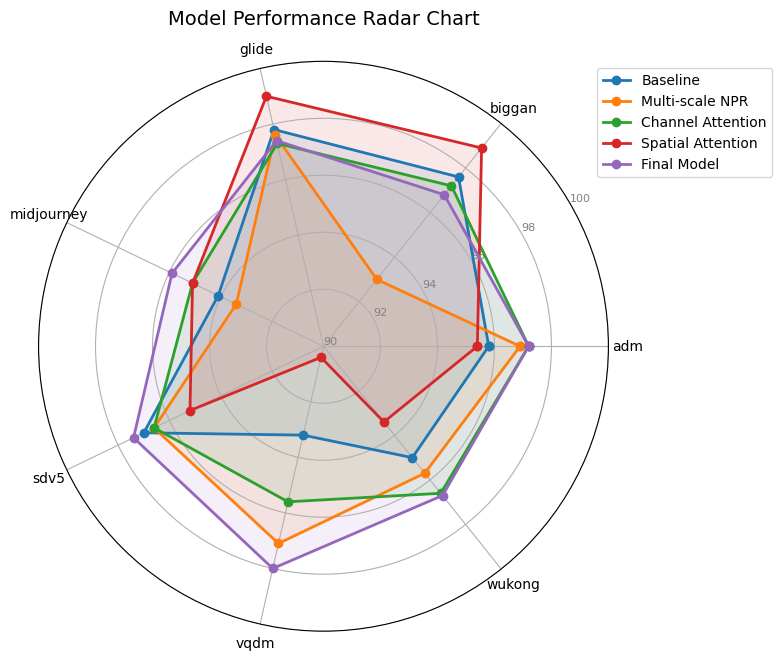

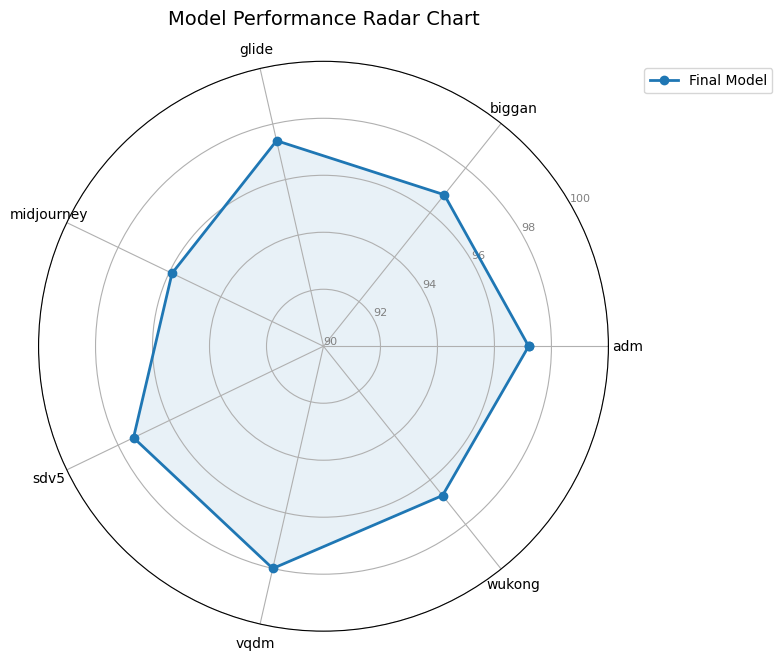

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_radar_chart(model_names, data_dict):
    # 获取类别列表
    categories = list(data_dict[model_names[0]].keys())
    N = len(categories)

    # 计算角度
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # 闭合图形

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

    for model in model_names:
        values = list(data_dict[model].values())
        values += values[:1]  # 闭合图形
        ax.plot(angles, values, 'o-', linewidth=2, label=model)
        ax.fill(angles, values, alpha=0.1)

    # 设置类别标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # 设置y轴标签位置和标签
    ax.set_rlabel_position(30)
    plt.yticks([90, 92, 94, 96, 98, 100], ["90", "92", "94", "96", "98", "100"], color="grey", size=8)
    ax.set_ylim(90, 100)

    # 添加图例和标题
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.title('Model Performance Radar Chart', size=14, y=1.05)
    plt.tight_layout()
    plt.show()

# 准备数据 - 为所有模型创建雷达图数据
radar_data = {
    'Baseline': {
        'adm': 95.8, 'biggan': 97.6, 'glide': 97.8,
        'midjourney': 94.1, 'sdv5': 97.0, 'vqdm': 93.2, 'wukong': 95.0
    },
    'Multi-scale NPR': {
        'adm': 96.9, 'biggan': 93.0, 'glide': 97.6,
        'midjourney': 93.4, 'sdv5': 96.6, 'vqdm': 97.1, 'wukong': 95.7
    },
    'Channel Attention': {
        'adm': 97.2, 'biggan': 97.2, 'glide': 97.3,
        'midjourney': 95.1, 'sdv5': 96.6, 'vqdm': 95.6, 'wukong': 96.6
    },
    'Spatial Attention': {
        'adm': 95.4, 'biggan': 98.9, 'glide': 99.0,
        'midjourney': 95.1, 'sdv5': 95.2, 'vqdm': 90.4, 'wukong': 93.4
    },
    'Final Model': {
        'adm': 97.2, 'biggan': 96.8, 'glide': 97.4,
        'midjourney': 95.9, 'sdv5': 97.4, 'vqdm': 98.0, 'wukong': 96.7
    }
}

# 绘制所有模型的雷达图
create_radar_chart(['Baseline', 'Multi-scale NPR', 'Channel Attention', 'Spatial Attention', 'Final Model'], radar_data)

# 也可以只绘制最终模型的雷达图
create_radar_chart(['Final Model'], radar_data)

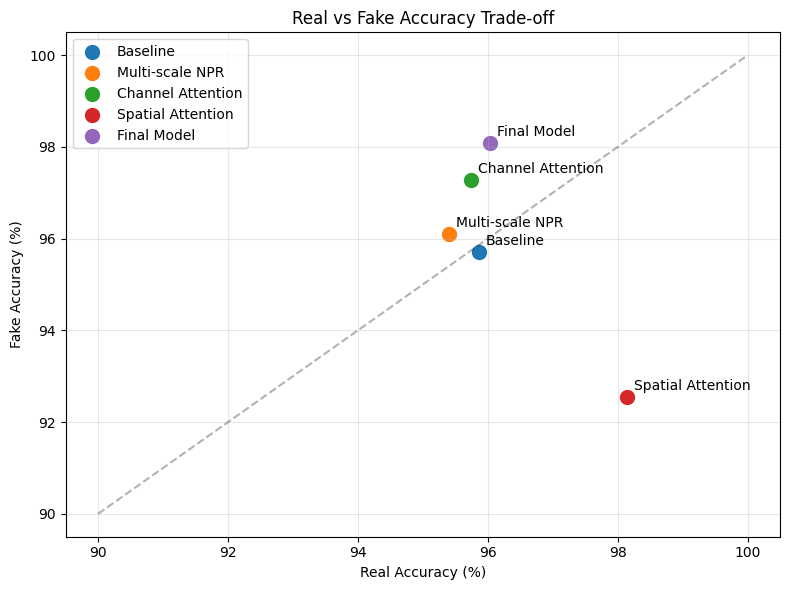

In [ ]:
# 为每个模型绘制Real Acc vs Fake Acc
real_fake_data = {
    'Baseline': (95.86, 95.71),
    'Multi-scale NPR': (95.40, 96.11),
    'Channel Attention': (95.74, 97.29),
    'Spatial Attention': (98.14, 92.54),
    'Final Model': (96.03, 98.09)
}

fig, ax = plt.subplots(figsize=(8, 6))
for model, (real, fake) in real_fake_data.items():
    ax.scatter(real, fake, s=100, label=model)
    ax.annotate(model, (real, fake), xytext=(5, 5), textcoords='offset points')

ax.plot([90, 100], [90, 100], 'k--', alpha=0.3)  # 对角线
ax.set_xlabel('Real Accuracy (%)')
ax.set_ylabel('Fake Accuracy (%)')
ax.set_title('Real vs Fake Accuracy Trade-off')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()